## Square Wave Fourier Series

Here we further investigate the Fourier Series, using some essential and powerful packages, numpy and matplotlib at the same time.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

## Square wave signal

First, let's generate a square wave signal.

We start by creating a time vector using the numpy linspace function. This function has the call signature:

- np.linspace(start, stop, number of points)

Then, we create a square wave using a combination of the sin and sign functions:

- np.sin(x) is the normal sinusoid function
- np.sign(x) always returns -1 or 1 depending on the sign of the input

In [13]:
# - time vector from 0 to 10 seconds, with 1000 points - #
t = np.linspace(0, 10, int(1e5))

# - make a 1 Hz. square wave - #
cos = np.cos(2 * np.pi * 1 * t)
sign = np.sign(cos)
square = (sign + 1) / 2

Let's plot our square wave using matplotlib. There are two methods for plotting:

1. Directly using plt functions
2. Using the object oriented interface

1. plt functions

plt functions are a quick, easy, direct way of plotting with matplotlib.

Text(0.5, 1.0, 'Square wave signal')

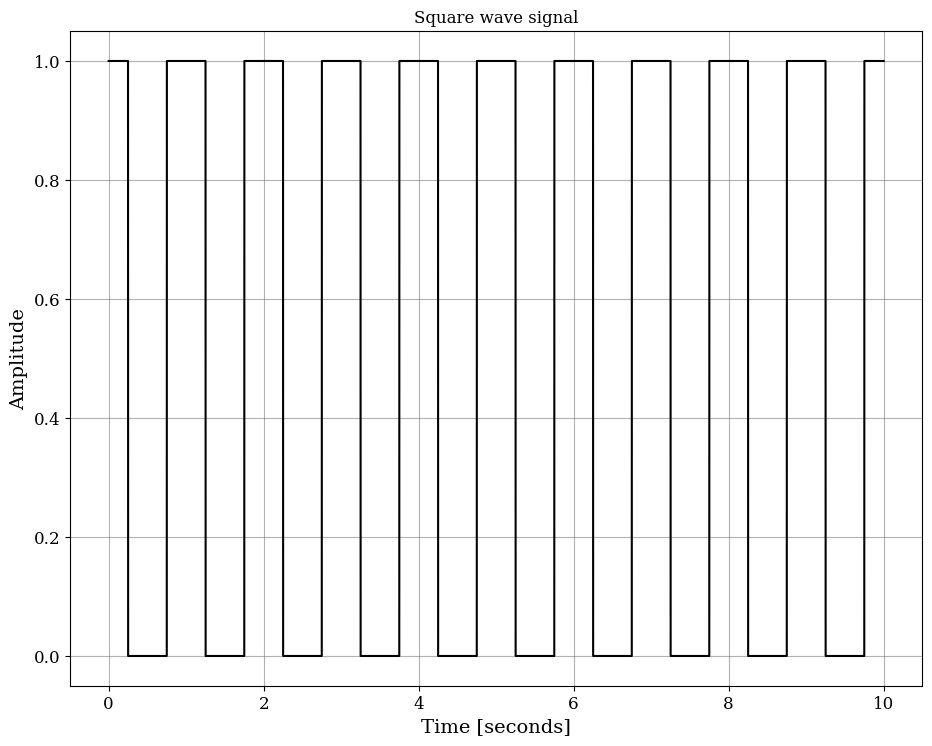

In [14]:
plt.plot(t, square)
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.title('Square wave signal')

2. Object oriented interface

The object-oriented interface is slightly more cumbersome for quick plots, but provides more flexibility and control for more
advanced plotting options.

This notebook will by using the object oriented interface

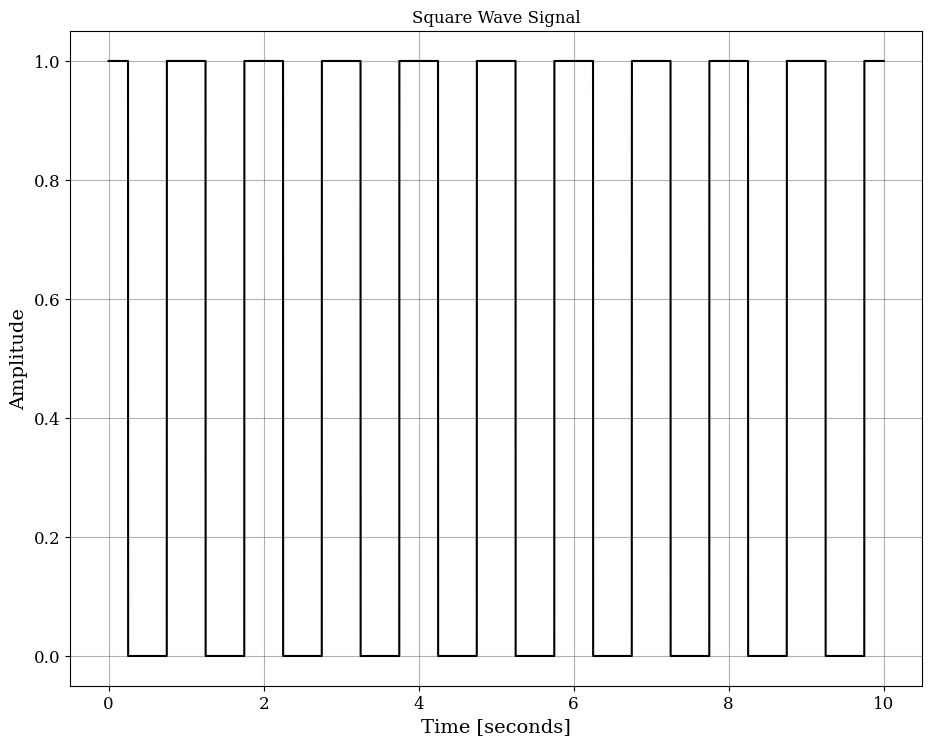

In [15]:
fig, ax = plt.subplots()

ax.set_xlabel('Time [seconds]')
ax.set_ylabel('Amplitude')
ax.set_title('Square Wave Signal')

ax.plot(t, square)

## Square wave signal Fourier Series coefficients

In [16]:
def get_fourier_representation(n, t):
    """ Generate the n point Fourier Series representation of a square wave signal.

    :param n: Number of coefficients to use in the Fourier Series representation.
    :param t: Time vector.
    """
    sig = (1/2) * np.ones_like(t)
    for k in range(1, n):
        coef = np.sin(k * (np.pi / 2)) / (k * np.pi)
        cos = np.cos(k * 2 * np.pi * t)
        sig += 2 * coef * cos
    
    return sig

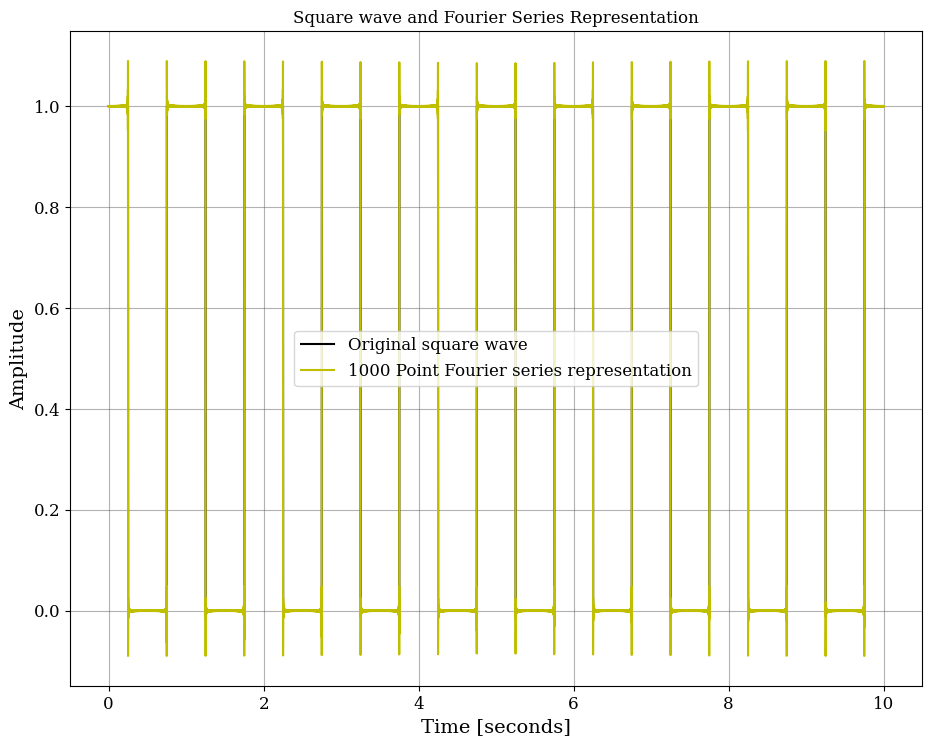

In [21]:
N = 1000
fourier_series = get_fourier_representation(N, t)

fig, ax = plt.subplots()
ax.set(
    xlabel='Time [seconds]',
    ylabel='Amplitude',
    title='Square wave and Fourier Series Representation',
)

ax.plot(t, square, label='Original square wave')
ax.plot(t, fourier_series, label='%i Point Fourier series representation' % N)
ax.legend()